In [5]:
import pandas as pd

df = pd.read_csv("gesture_recognition_preprocessed_data.csv")
# rename the fucking column names+
rename = {old: chr(ord('X') + ((i - 3) // 20)) + '' + str((i - 3) % 20) if i >= 3 else old for i, old in enumerate(df.columns.values)}
df.rename(columns=rename, inplace=True)
df

gesture  person  sample        X0        X1        X2        X3  \
0          left       0       0 -3.821744 -4.015376 -3.990985 -3.990985   
1         right       0       0  0.110582  0.056807 -0.002339 -0.098367   
2            up       0       0  4.460697  3.501819  3.403059  2.721294   
3          down       0       0 -2.824111 -1.710594 -0.030825 -0.030825   
4        square       0       0  0.023643  0.016610  0.077512  1.426692   
...         ...     ...     ...       ...       ...       ...       ...   
2155       down       8      29 -1.106271 -1.065719 -0.996736  0.055216   
2156     square       8      29 -1.171962 -0.911466  0.952924  1.197400   
2157   triangle       8      29 -0.067935 -0.190938  0.052680  0.661761   
2158   circleCw       8      29 -0.211887 -0.176273  0.015665  0.608836   
2159  circleCcw       8      29 -0.321871 -0.270167 -0.283957 -0.240318   

            X4        X5        X6  ...        Z10        Z11        Z12  \
0    -3.981707 -3.881300 -3.679140  ...  -0.087388  -0.046088   0.065691   
1    -0.194529 -0.194529 -0.163853  ...  -0.520140  -0.044340   0.449819   
2    -1.290530 -2.066960 -3.116928  ... -14.996059 -13.450255 -12.394309   
3    -0.033818  0.075354  0.502263  ...  -2.377112   5.780839   8.907927   
4     3.290429  4.745008  3.859965  ...  -2.874310  -4.336348  -0.729798   
...        ...       ...       ...  ...        ...        ...        ...   
2155  0.053271  0.050278  0.054468  ...  -7.000347  -5.405060  -0.975039   
2156 -0.281917  0.641914  3.963601  ...  -4.013241   0.870418   2.957753   
2157  1.041123  2.603198  3.254665  ...  -2.884485  -2.685680   0.296716   
2158  1.150516  1.969144  2.477518  ...   1.642422  -0.072133  -4.448821   
2159  2.098258  3.449013  4.578312  ...   1.176183  -2.668046  -3.908235   

            Z13        Z14        Z15        Z16        Z17        Z18  \
0      0.065691   0.012420   0.114473  -0.003891  -0.006434  -0.034117   
1      0.935668   1.084077   1.363230   1.373673   1.362002   1.197180   
2    -12.113014 -12.113014 -12.113014 -12.216911 -12.224881 -12.094932   
3      7.623194   2.261646  -0.530103  -1.125314  -1.103010  -0.760758   
4     -0.159144  -0.002725   0.151882  -0.138564   0.530072   0.877774   
...         ...        ...        ...        ...        ...        ...   
2155   2.083105   2.583792   2.604891   2.248455   1.088464   0.074220   
2156  -4.378349  -4.450223  -0.084845  -0.664092  -0.245555  -0.432752   
2157   1.587505  -1.647998  -3.003872  -3.225966  -0.832458  -0.458789   
2158  -4.316887  -2.010988  -1.532738  -0.843531  -0.420033  -0.168980   
2159  -3.296855  -1.777096  -0.936023   0.679953  -0.202326  -0.305410   

            Z19  
0     -0.058957  
1      1.146823  
2    -12.212973  
3     -0.503231  
4      0.368707  
...         ...  
2155  -0.709731  
2156  -0.287753  
2157  -0.528071  
2158  -0.005387  
2159  -0.190938  

[2160 rows x 63 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gesture  2160 non-null   object 
 1   person   2160 non-null   int64  
 2   sample   2160 non-null   int64  
 3   X0       2160 non-null   float64
 4   X1       2160 non-null   float64
 5   X2       2160 non-null   float64
 6   X3       2160 non-null   float64
 7   X4       2160 non-null   float64
 8   X5       2160 non-null   float64
 9   X6       2160 non-null   float64
 10  X7       2160 non-null   float64
 11  X8       2160 non-null   float64
 12  X9       2160 non-null   float64
 13  X10      2160 non-null   float64
 14  X11      2160 non-null   float64
 15  X12      2160 non-null   float64
 16  X13      2160 non-null   float64
 17  X14      2160 non-null   float64
 18  X15      2160 non-null   float64
 19  X16      2160 non-null   float64
 20  X17      2160 non-null   float64
 21  X18      2160 

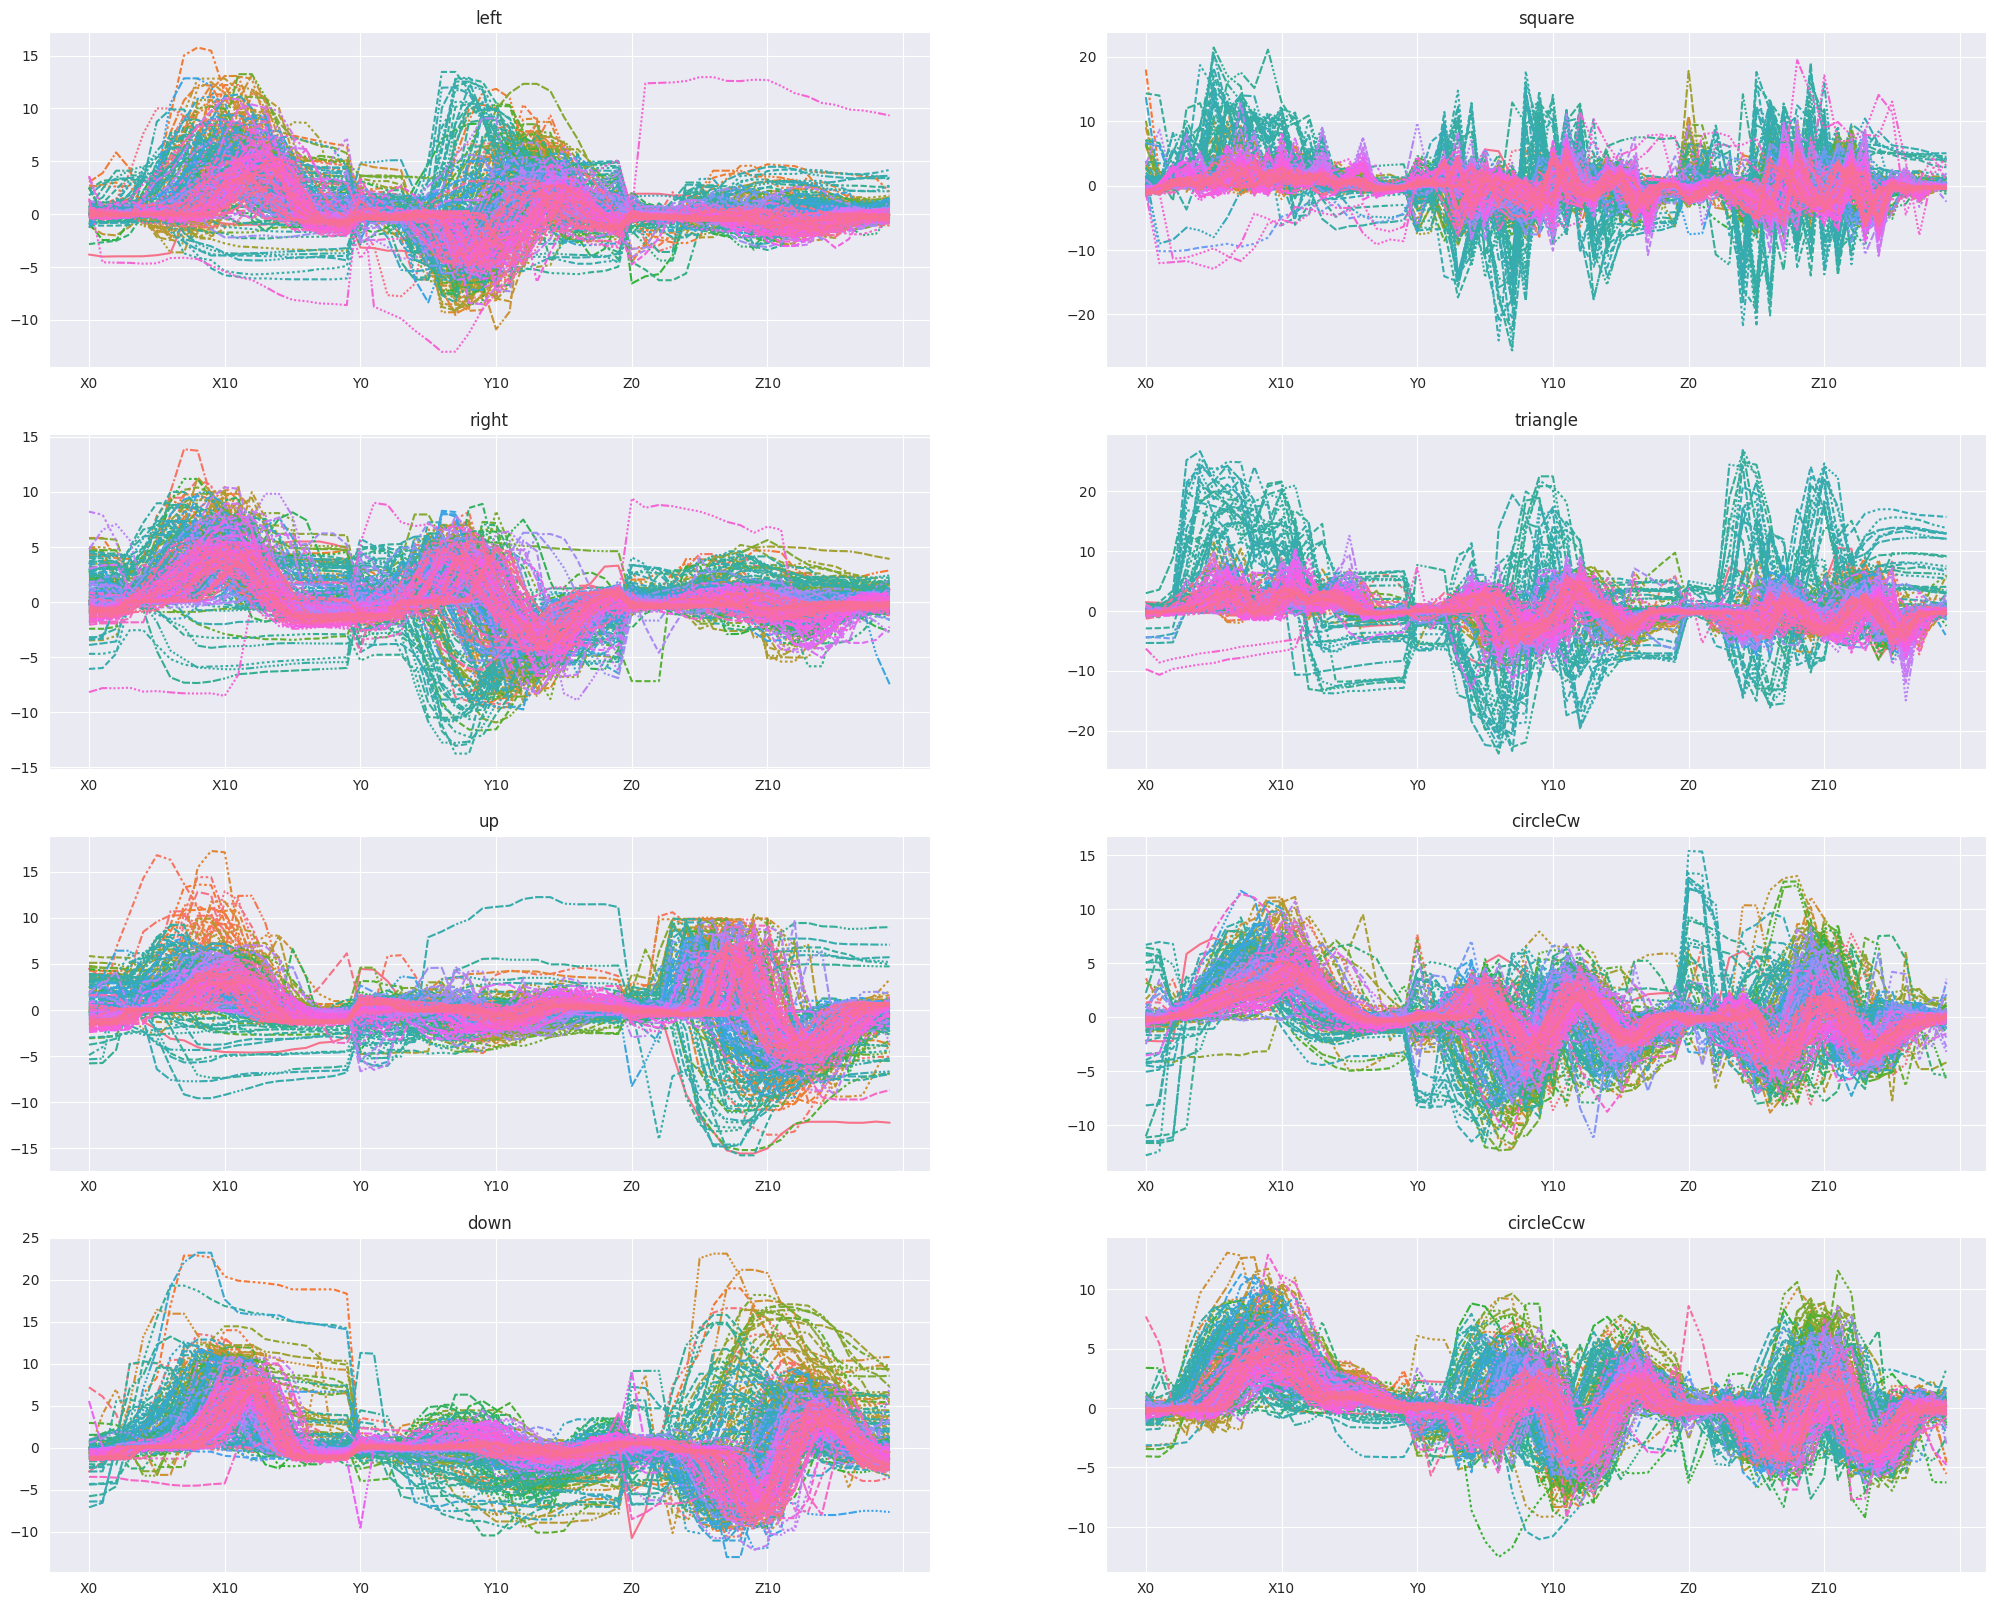

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

def plot_gestures(df):
    gestures = df["gesture"].unique()
    fig, ax = plt.subplots(4, 2, figsize=(25, 20))

    for i, gesture in enumerate(gestures):
        cur_ax = ax[i % 4][i // 4]
        cur_ax.set_title(gesture)
        cur_ax.set_xticks(range(0, 61, 10))
        sns.lineplot(df[df["gesture"] == gesture][df.columns.values[3:]].transpose(), legend=False, ax=cur_ax)
    plt.show()

plot_gestures(df)

In [8]:
from scipy.signal import medfilt
filtered_df = df[df.columns.values[3:]].apply(func=lambda x: medfilt(x, kernel_size=9))
filtered_df = pd.concat([df[["gesture", "person", "sample"]], filtered_df], axis=1)
filtered_df

gesture  person  sample        X0        X1        X2        X3  \
0          left       0       0  0.000000  0.000000  0.000000  0.000000   
1         right       0       0  0.000000  0.000000  0.000000  0.000000   
2            up       0       0  0.000000  0.000000  0.000000  0.000000   
3          down       0       0  0.023643  0.016610  0.000000  0.591069   
4        square       0       0  0.023643  0.016610 -0.002339  0.591069   
...         ...     ...     ...       ...       ...       ...       ...   
2155       down       8      29 -0.211887 -0.270167 -0.068589  0.103549   
2156     square       8      29 -0.211887 -0.190938  0.000000  0.103549   
2157   triangle       8      29 -0.211887 -0.190938  0.000000  0.103549   
2158   circleCw       8      29 -0.067935 -0.176273  0.000000  0.055216   
2159  circleCcw       8      29 -0.067935 -0.176273  0.000000  0.000000   

            X4        X5        X6  ...       Z10       Z11       Z12  \
0     0.000000  0.000000  0.000000  ... -0.087388  0.000000  0.000000   
1     0.000000  0.000000  0.000000  ... -0.087388  0.000000  0.000000   
2     0.000000  0.000000  0.000000  ... -0.520140 -0.044340  0.000000   
3     0.000000  0.000000  0.000000  ... -0.520140 -0.046088  0.000000   
4    -0.033818 -0.164790  0.182455  ... -0.520140 -0.046088 -0.000591   
...        ...       ...       ...  ...       ...       ...       ...   
2155  0.084545  0.641914  2.477518  ... -1.279102 -1.194124 -0.975039   
2156  0.084545  0.641914  2.477518  ... -1.279102 -1.194124 -0.677858   
2157  0.084545  0.641914  2.477518  ... -0.655413 -0.579972 -0.415756   
2158  0.053271  0.100856  0.243453  ...  0.000000 -0.072133  0.000000   
2159  0.000000  0.050278  0.054468  ...  0.000000  0.000000  0.000000   

           Z13       Z14       Z15       Z16       Z17       Z18       Z19  
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.000000  0.000000  0.000000 -0.003891  0.000000  0.000000  0.000000  
2     0.000000  0.000000  0.000000 -0.003891  0.000000  0.000000  0.000000  
3    -0.159144  0.000000  0.000000 -0.003891  0.000000  0.000000  0.000000  
4    -0.159144  0.012420 -0.028589 -0.003891 -0.006434 -0.034117 -0.058957  
...        ...       ...       ...       ...       ...       ...       ...  
2155 -1.976579 -1.647998 -0.508768 -0.296511 -0.202326 -0.252139 -0.287753  
2156 -0.658579 -0.577656 -0.084845  0.000000 -0.202326 -0.252139 -0.287753  
2157 -0.271458 -0.293132  0.000000  0.000000 -0.098462 -0.168980 -0.190938  
2158  0.000000 -0.293132  0.000000  0.000000  0.000000  0.000000 -0.005387  
2159  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000 -0.005387  

[2160 rows x 63 columns]

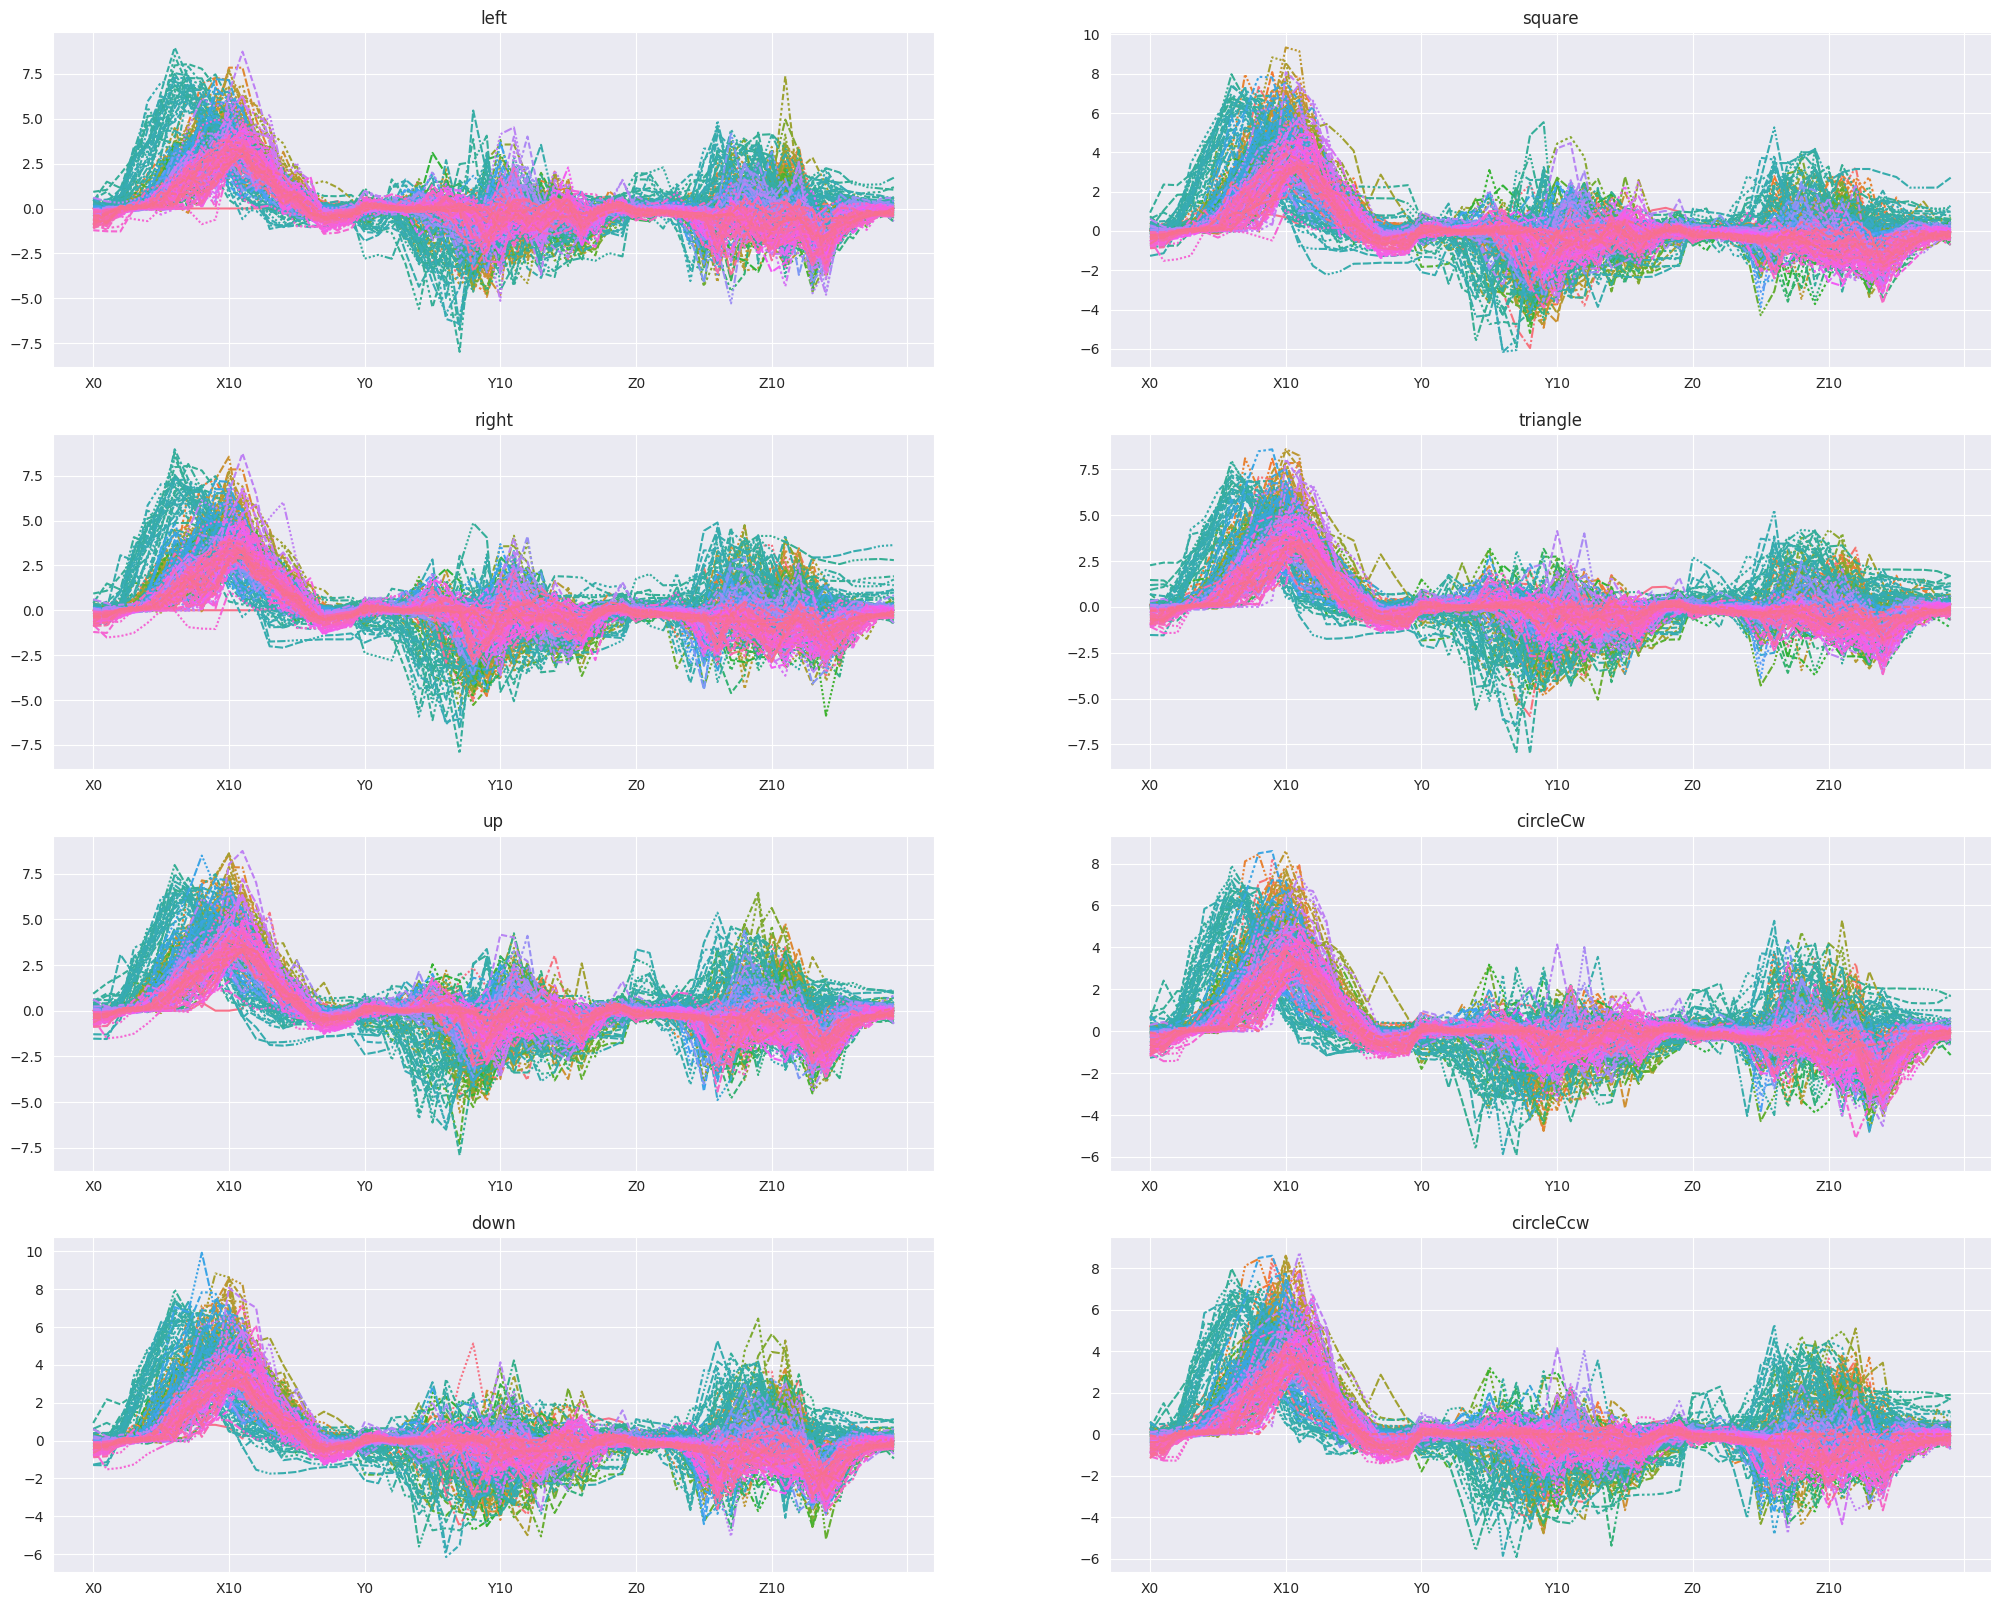

In [10]:
plot_gestures(filtered_df)